In this notebook we are going to visualize the dataset which have cleaned Genres, Director, Cast and alreday have combined with information from the CMU dataset as long as the popularity and imdb_id form the Kaggle IMDB dataset. 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas

from seaborn import set_style
set_style("whitegrid")
my_red = "#a30e03"

In [2]:
data = pd.read_csv('../wiki_plots_with_genres.csv.zip')
data2 = pd.read_csv('../Data/wiki_plots_with_genres_c3.zip')
data = data.drop(columns = ['Unnamed: 0'])
data2 = data2.drop(columns = ['Unnamed: 0'])

In [3]:
origin_count = data2.Origin.value_counts().to_frame().reset_index()
origin_count = origin_count.rename(columns={"index": "iso_a3", "Origin": "Count"})
new_ind = ['USA', 'GBR', 'IND', 'IND', 'IND', 'JPN',
       'IND', 'CHN', 'CAN', 'AUS', 'KOR',
       'CHN', 'IND', 'IND', 'RUS', 'IND', 'PHL',
       'BGD', 'IND', 'TUR', 'MYS', 'EGY',
       'IND', 'MDV']
origin_count['iso_a3'] = new_ind

In [4]:
aggregation_functions = {'iso_a3': 'first', 'Count': 'sum'}
df_new = origin_count.groupby(origin_count['iso_a3']).aggregate(aggregation_functions)
df_new = df_new.drop(columns = ['iso_a3'])
df_new = df_new.sort_values(by = ['Count'],ascending = False).reset_index()

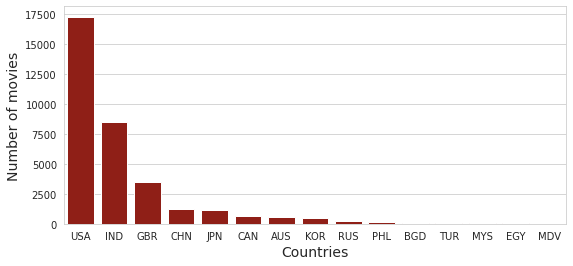

In [50]:
plt.figure(figsize=(9, 4))
sns.barplot(x = df_new['iso_a3'], y = df_new['Count'], color="#a30e03")
plt.xlabel("Countries",size = 14)
plt.ylabel("Number of movies",size = 14)
plt.show()

In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
map_toplot  = world.merge(df_new,how = 'left',on='iso_a3')

In [8]:
map_toplot = map_toplot.fillna(value = 0)

<Figure size 4320x1728 with 0 Axes>

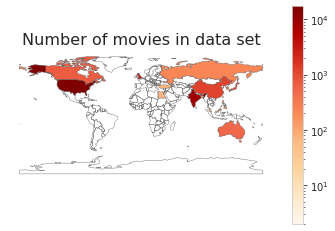

In [9]:
plt.figure(figsize=(60, 24))
ax = map_toplot.plot(column="Count", cmap="OrRd", linewidth=0.4, edgecolor=".4",legend=True,
               norm=matplotlib.colors.LogNorm(vmin=df_new["Count"].min(), vmax=df_new["Count"].max()))
#genreated heatmap on origin of the movies on map
plt.title('Number of movies in data set', size=16)
ax.set_axis_off()
plt.show()

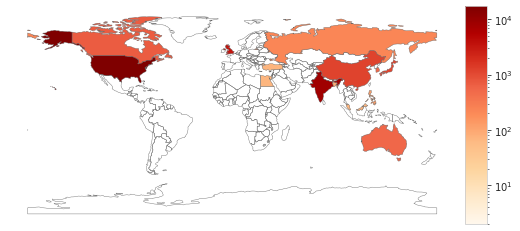

In [51]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
fig, ax = plt.subplots(1, 1, figsize=(9,4)) 
divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1) 
map_toplot.plot(ax=ax, cax=cax, column="Count", cmap="OrRd", linewidth=0.4, edgecolor=".4",legend=True,
               norm=matplotlib.colors.LogNorm(vmin=df_new["Count"].min(), vmax=df_new["Count"].max()) )
#plt.title('Number of movies in data set', size=16)
ax.set_axis_off()
plt.show()

<Figure size 1728x864 with 0 Axes>

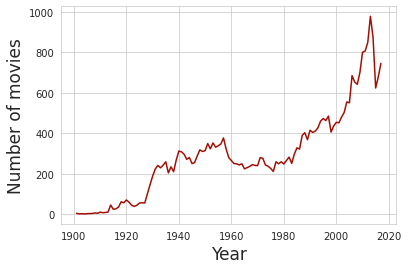

In [84]:
year_count = data2['Release Year'].value_counts().to_frame().reset_index()
year_count = year_count.rename(columns={"index": "year", "Release Year": "Count"})
year_count = year_count.sort_values(by = ['year'])
plt.figure(figsize=(24, 12))
year_count.plot(x='year', 
             y='Count', color = "#A30E03", 
             legend = False)
plt.xlabel("Year",size= 17)
plt.ylabel("Number of movies",size= 17)
#plt.title('Number of movies made in dataset per year',size=20)
#data have movies form 1901 to 2017.
plt.savefig("movie-year-graph.png", transparent=True)
#plt.show()

In [14]:
pop_rev = data2.dropna(subset= ['popularity','Revenue'])
pop = pop_rev['popularity'].to_list()

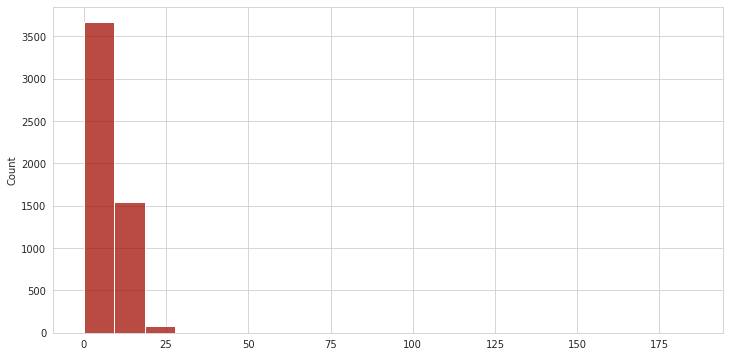

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(x = pop_rev['popularity'].to_list(), bins = 20, color=my_red)
plt.show()

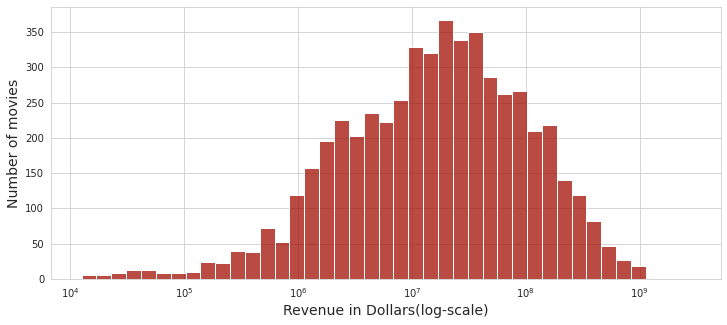

In [56]:
plt.figure(figsize=(12, 5))
sns.histplot(x = pop_rev['Revenue'].to_list(),log_scale=True, color=my_red)
plt.xlabel("Revenue in Dollars(log-scale)",size= 14)
plt.ylabel("Number of movies",size= 14)
plt.show()

In [17]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Wiki Page,Plot,Genre
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",set()
1,1901,Love by the Light of the Moon,American,Unknown,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",set()
2,1901,The Martyred Presidents,American,Unknown,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",{'short'}
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,"{'silent', 'short', 'comedy'}"
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,{'short'}


In [72]:
key_genre = [ 'drama', 'comedy', 'romance', 'action', 'thriller', 
             'adventure', 'crime', 'indie', 'musical', 'horror', 'documentary', 
             'animation', 'mystery', 'science-fiction', 'fantasy']
genre_count = {key: 0 for key in key_genre}

In [73]:
for index, row in data.iterrows():
    for i in key_genre:
        if i in row['Genre']:
            genre_count[i] = genre_count[i]+1

In [74]:
genre_count['sci-fi'] = genre_count.pop('science-fiction')
genre_count['anim.'] = genre_count.pop('animation')
genre_count['docu.'] = genre_count.pop("documentary")
genre_count = dict(sorted(genre_count.items(), key=lambda item: item[1],reverse=True))

In [75]:
genre_count

{'drama': 15140,
 'comedy': 9713,
 'romance': 6153,
 'action': 5728,
 'thriller': 4857,
 'adventure': 4170,
 'crime': 4035,
 'horror': 2229,
 'musical': 2063,
 'indie': 1753,
 'mystery': 1664,
 'sci-fi': 1492,
 'fantasy': 1384,
 'anim.': 1012,
 'docu.': 130}

In [66]:
def add_value_labels(ax, spacing=5, labels=None, size=15):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    
    Credit: justfortherec on stackoverflow
            https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    """

    # For each bar: Place a label
    for i in range(len(ax.patches)):
        rect = ax.patches[i]
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() #+ rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value) if labels==None else labels[i]

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='left',                # Horizontally center label
            va=va,                      # Vertically align label differently for
            size=size)                  #    positive and negative values.    
                                        



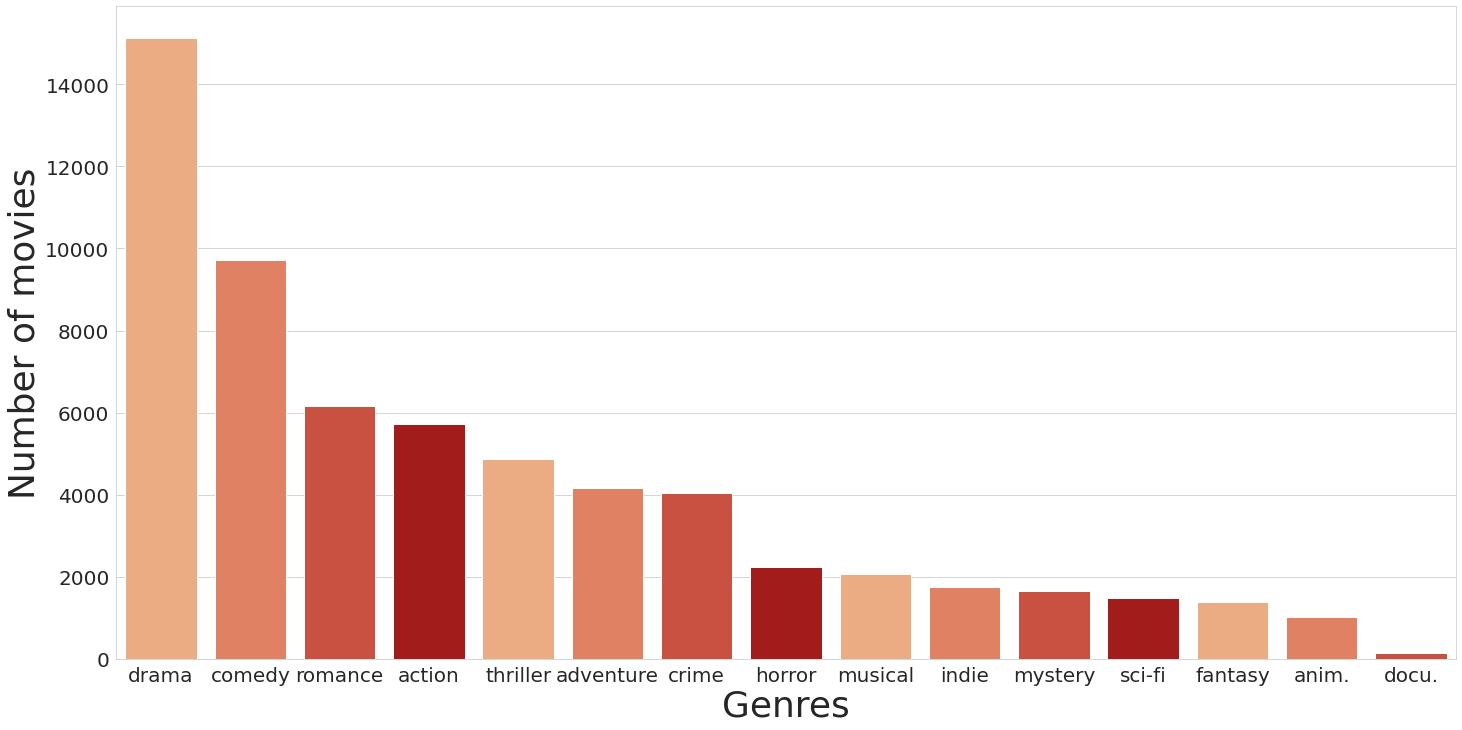

In [87]:
plt.figure(figsize=(24, 12))
pal = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
color_lst = [#(0.9955709342560554, 0.8996539792387543, 0.7629988465974625), 
             #(0.9921568627450981, 0.8029219530949635, 0.5900192233756247), 
             (0.9905113417916186, 0.6576393694732795, 0.4468896578239139), 
             (0.9586466743560169, 0.4618992695117263, 0.3103267973856209), 
             (0.8704498269896194, 0.2485505574778931, 0.16822760476739718), 
             (0.7202306805074971, 0.02435986159169551, 0.015732410611303344)]

ax = sns.barplot(x = list(genre_count.keys()), 
                 y=list(genre_count.values()), palette=color_lst )#color="#a30e03")
#plt.xticks(range(len(genre_count)), list(genre_count.keys()))
#add_value_labels(ax,labels=list(genre_count.keys()))
ax.tick_params(axis="both",which="major",labelsize=20)
plt.xlabel("Genres",size= 36)
plt.ylabel("Number of movies",size=36)
plt.savefig("movie-genre-barplot.png",transparent=True)
#plt.show()

In [41]:
pal = sns.color_palette("OrRd") 
print(pal) 

[(0.9955709342560554, 0.8996539792387543, 0.7629988465974625), (0.9921568627450981, 0.8029219530949635, 0.5900192233756247), (0.9905113417916186, 0.6576393694732795, 0.4468896578239139), (0.9586466743560169, 0.4618992695117263, 0.3103267973856209), (0.8704498269896194, 0.2485505574778931, 0.16822760476739718), (0.7202306805074971, 0.02435986159169551, 0.015732410611303344)]


In [ ]:
after_1990 = 0
for index, row in year_count.iterrows():
    if row['year']>1990:
        after_1990 = after_1990+ row['Count']

In [ ]:
after_1990/len(data)

In [ ]:
17272/len(data)

In [ ]:
df_new